In [18]:
!wget https://ultralytics.com/images/bus.jpg

--2025-06-24 22:04:25--  https://ultralytics.com/images/bus.jpg
Resolving ultralytics.com (ultralytics.com)... 75.2.70.75, 99.83.190.102
Connecting to ultralytics.com (ultralytics.com)|75.2.70.75|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ultralytics.com/images/bus.jpg [following]
--2025-06-24 22:04:26--  https://www.ultralytics.com/images/bus.jpg
Resolving www.ultralytics.com (www.ultralytics.com)... 104.18.40.102, 172.64.147.154, 2606:4700:4400::6812:2866, ...
Connecting to www.ultralytics.com (www.ultralytics.com)|104.18.40.102|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/ultralytics/assets/releases/download/v0.0.0/bus.jpg [following]
--2025-06-24 22:04:26--  https://github.com/ultralytics/assets/releases/download/v0.0.0/bus.jpg
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP requ

In [1]:
from ultralytics import YOLO

In [15]:
import cv2
import matplotlib.pyplot as plt

def visualize_yolov_results(image_path, result, conf_threshold=0.3):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape

    boxes = result.boxes.xyxyn
    confs = result.boxes.conf
    class_ids = result.boxes.cls.int()
    names = [result.names[int(cls)] for cls in class_ids]

    for i in range(len(boxes)):
        conf = confs[i].item()
        if conf < conf_threshold:
            continue

        x1, y1, x2, y2 = boxes[i]
        x1, y1, x2, y2 = int(x1.item() * w), int(y1.item() * h), int(x2.item() * w), int(y2.item() * h)

        label = f"{names[i]}: {conf:.2f}"

        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, (0, 255, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.title("YOLO11n Detection Results")
    plt.show()

In [2]:
model = YOLO("yolo11n.pt")

In [3]:
results = model("bus.jpg")


image 1/1 /home/yechani9/PycharmProjects/ultralytics-yolo11/bus.jpg: 640x480 4 persons, 1 bus, 31.0ms
Speed: 2.3ms preprocess, 31.0ms inference, 57.6ms postprocess per image at shape (1, 3, 640, 480)


In [8]:
len(results)

1

In [19]:
results[0].show()

tensor([[400.0281, 478.8865, 792.3688, 499.0342],
        [740.4150, 636.7817, 138.7871, 483.8625],
        [143.3595, 651.8820, 191.8990, 504.6262],
        [283.7646, 634.5645, 121.4067, 451.7532],
        [ 34.4451, 714.2201,  68.8479, 316.2890]], device='cuda:0')
tensor([[0.4939, 0.4434, 0.9782, 0.4621],
        [0.9141, 0.5896, 0.1713, 0.4480],
        [0.1770, 0.6036, 0.2369, 0.4672],
        [0.3503, 0.5876, 0.1499, 0.4183],
        [0.0425, 0.6613, 0.0850, 0.2929]], device='cuda:0')
tensor([[3.8437e+00, 2.2937e+02, 7.9621e+02, 7.2840e+02],
        [6.7102e+02, 3.9485e+02, 8.0981e+02, 8.7871e+02],
        [4.7410e+01, 3.9957e+02, 2.3931e+02, 9.0420e+02],
        [2.2306e+02, 4.0869e+02, 3.4447e+02, 8.6044e+02],
        [2.1153e-02, 5.5608e+02, 6.8869e+01, 8.7236e+02]], device='cuda:0')
tensor([[4.7454e-03, 2.1238e-01, 9.8298e-01, 6.7445e-01],
        [8.2842e-01, 3.6560e-01, 9.9976e-01, 8.1362e-01],
        [5.8531e-02, 3.6997e-01, 2.9544e-01, 8.3722e-01],
        [2.7538e-01, 3

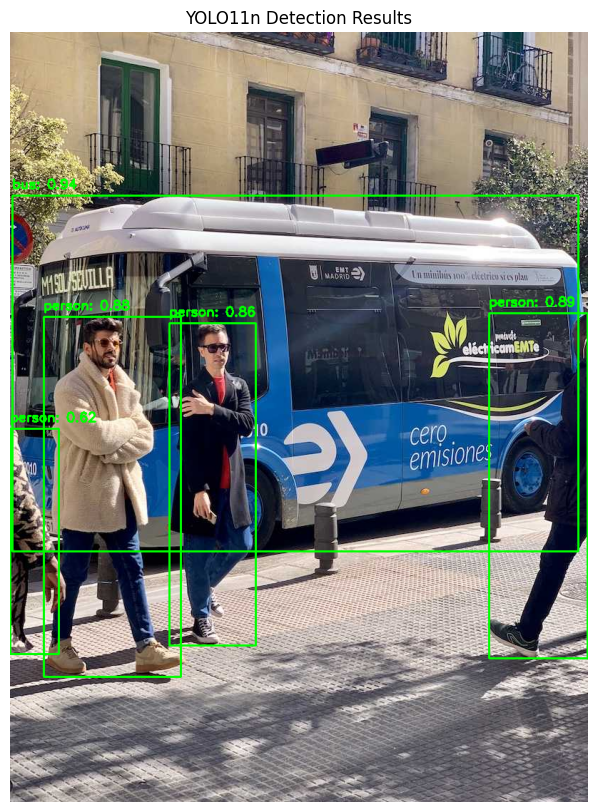

In [17]:
for result in results:
    image_path = "bus.jpg"
    xywh = result.boxes.xywh  # center-x, center-y, width, height
    xywhn = result.boxes.xywhn  # normalized
    xyxy = result.boxes.xyxy  # top-left-x, top-left-y, bottom-right-x, bottom-right-y
    xyxyn = result.boxes.xyxyn  # normalized
    names = [result.names[cls.item()] for cls in result.boxes.cls.int()]  # class name of each box
    confs = result.boxes.conf  # confidence score of each box
    print(xywh)
    print(xywhn)
    print(xyxy)
    print(xyxyn)
    print(names, confs)
    visualize_yolov_results(image_path, result)